In [850]:
# Importing all the Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [851]:
# For loading .arff files
from scipy.io import arff
# To perform mean imputation
from sklearn.preprocessing import Imputer
#To perform kFold Cross Validation
from sklearn.model_selection import KFold
# Formatted counter of class labels
from collections import Counter
# Ordered Dictionary
from collections import OrderedDict
# Library imbalanced-learn to deal with the data imbalance. To use SMOTE oversampling
from imblearn.over_sampling import SMOTE 
# To analyze the type of missing data
import missingno as msno
# Library for performing k-NN and MICE imputations 
import fancyimpute

# To perform mean imputation
from sklearn.preprocessing import Imputer


In [852]:
# Impoting classification models
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [853]:
# Import metrics
from sklearn import metrics

In [854]:
# Read the data
train = pd.read_csv("house_price_train.csv")
test = pd.read_csv("house_price_test.csv")
print(train.shape,test.shape)
 

(1460, 81) (1459, 80)


In [855]:
# Contatenate train and test data
train_labels = train.pop('SalePrice') # separate labels from Train dataset
data = pd.concat([train,test], keys=['train','test'])
print(data.columns)
print(data.shape)
print(train.shape)
print(test.shape)


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [856]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [857]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [858]:
print(test.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [859]:
trian = train.drop('Id',axis=1, inplace=True)


In [860]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [861]:
train.shape

(1460, 79)

In [862]:
test = test.drop('Id', axis=1)

In [863]:
test.shape

(1459, 79)

In [864]:
# Extracting the Object Dtpes into another dataframe
#obj_df = house_train_data.select_dtypes(include=['object']).copy()
#obj_df.head()

## Converting Multiple columns to categories in pandas apply
#df[to_convert] = df[to_convert].apply(lambda x: x.astype('category'), axis=0)

In [865]:
#obj_df[obj_df.isnull().any(axis=1)]

In [866]:
#house_train_dat.select_dtypes(include=['float64']).apply(your_function)

In [867]:
# Converting Object type to Catogry

for col in train.columns:
   if (train[col].dtype == "object"):
       train[col] = train[col].astype('category')

for col in train.columns:
   if (train[col].dtype == np.float64):
       train[col] = train[col].fillna(0).astype(np.int64)
    
for col in test.columns:
   if (test[col].dtype == "object"):
       test[col] = test[col].astype('category')
        
for col in test.columns:
   if (test[col].dtype == np.float64):
       test[col] = test[col].fillna(0).astype(np.int64)

In [868]:
#house_train_data.info()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null category
LotFrontage      1460 non-null int64
LotArea          1460 non-null int64
Street           1460 non-null category
Alley            91 non-null category
LotShape         1460 non-null category
LandContour      1460 non-null category
Utilities        1460 non-null category
LotConfig        1460 non-null category
LandSlope        1460 non-null category
Neighborhood     1460 non-null category
Condition1       1460 non-null category
Condition2       1460 non-null category
BldgType         1460 non-null category
HouseStyle       1460 non-null category
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null category
RoofMatl         1460 non-null category
Exterior1st      1460 non-null categ

In [869]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
MSSubClass       1459 non-null int64
MSZoning         1455 non-null category
LotFrontage      1459 non-null int64
LotArea          1459 non-null int64
Street           1459 non-null category
Alley            107 non-null category
LotShape         1459 non-null category
LandContour      1459 non-null category
Utilities        1457 non-null category
LotConfig        1459 non-null category
LandSlope        1459 non-null category
Neighborhood     1459 non-null category
Condition1       1459 non-null category
Condition2       1459 non-null category
BldgType         1459 non-null category
HouseStyle       1459 non-null category
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null category
RoofMatl         1459 non-null category
Exterior1st      1458 non-null cate

In [870]:
#Creating dummy variables.

#If we have k levels in a category, then we create k-1 dummy variables as the last one would be redundant. 
#So we use the parameter drop_first in pd.get_dummies function that drops the first level in each of the category

categorical_Attributes = train.select_dtypes(include=['category']).columns

In [871]:
print(train.columns, train.shape)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [872]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null category
LotFrontage      1460 non-null int64
LotArea          1460 non-null int64
Street           1460 non-null category
Alley            91 non-null category
LotShape         1460 non-null category
LandContour      1460 non-null category
Utilities        1460 non-null category
LotConfig        1460 non-null category
LandSlope        1460 non-null category
Neighborhood     1460 non-null category
Condition1       1460 non-null category
Condition2       1460 non-null category
BldgType         1460 non-null category
HouseStyle       1460 non-null category
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null category
RoofMatl         1460 non-null category
Exterior1st      1460 non-null categ

In [873]:
from feature_selector import FeatureSelector

In [874]:
#Implementation
#The FeatureSelector has five functions for identifying columns to remove:

#identify_missing
#identify_single_unique
#identify_collinear
#identify_zero_importance
#identify_low_importance

fs = FeatureSelector(data = train, labels = train_labels)

In [875]:
#Missing Values
# Identify the features whose missing percentage is large than 20%
fs.identify_missing(missing_threshold=0.20)

5 features with greater than 0.20 missing values.



In [876]:
# list the Missing features whose percentage is greater than 20%
missing_features = fs.ops['missing']
missing_features[:10]

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

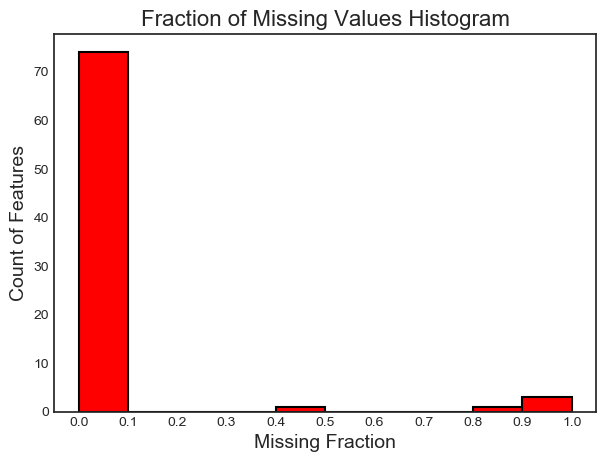

In [877]:
# Plot the Histogram for missing features
fs.plot_missing()

In [878]:
# Top 12 Missing features Perecentage
fs.missing_stats.head(12)

,missing_fraction
PoolQC,0.995205
MiscFeature,0.963014
Alley,0.937671
Fence,0.807534
FireplaceQu,0.472603
GarageType,0.055479
GarageQual,0.055479
GarageCond,0.055479
GarageFinish,0.055479
BsmtFinType2,0.026027


In [879]:
#Finding Single Unique value
fs.identify_single_unique()

0 features with a single unique value.



In [880]:
#Collinear (highly correlated) Features
fs.identify_collinear(correlation_threshold=0.81)

3 features with a correlation magnitude greater than 0.81.



In [881]:
correlated_features = fs.ops['collinear']
correlated_features[:5]

['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea']

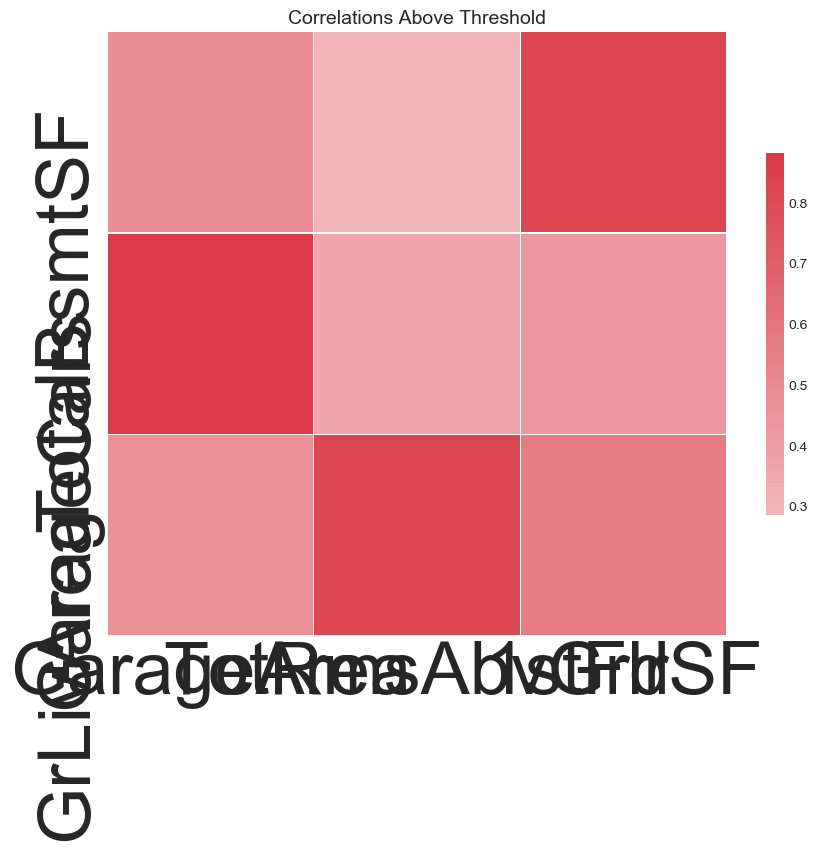

In [882]:
fs.plot_collinear()

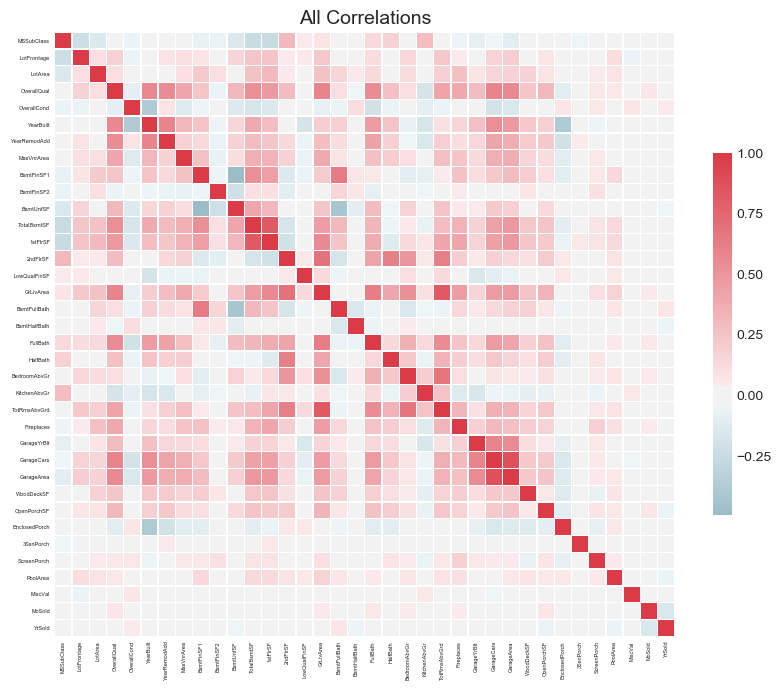

In [883]:
fs.plot_collinear(plot_all=True)

3 features with a correlation magnitude greater than 0.80.



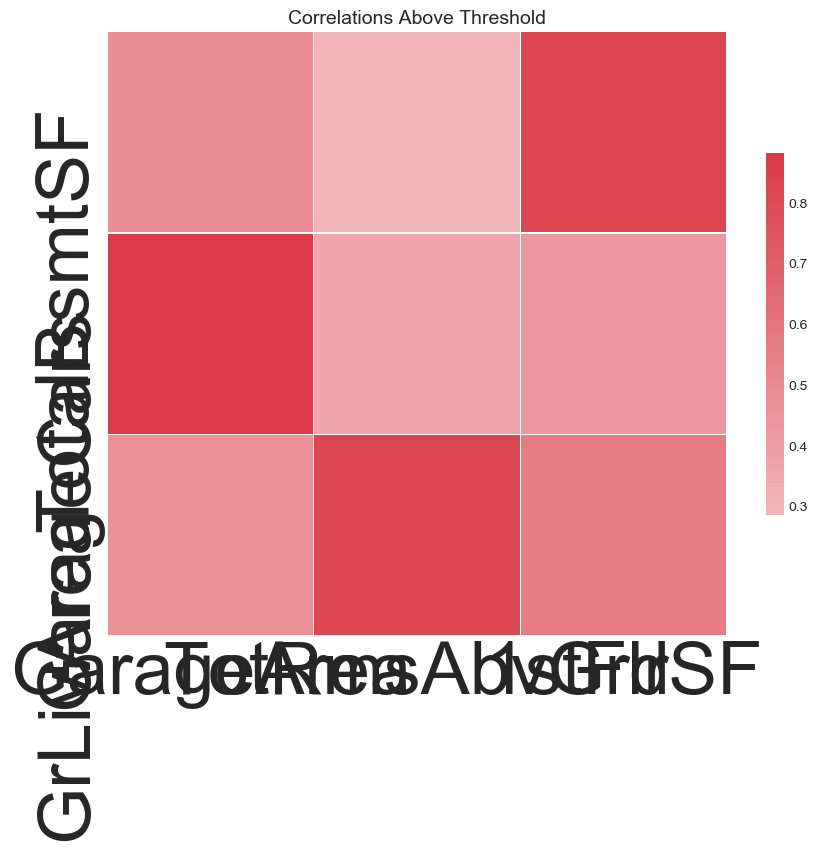

In [884]:
fs.identify_collinear(correlation_threshold=0.80)
fs.plot_collinear()

In [885]:
fs.record_collinear

,drop_feature,corr_feature,corr_value
0,1stFlrSF,TotalBsmtSF,0.819530
1,TotRmsAbvGrd,GrLivArea,0.825489
2,GarageArea,GarageCars,0.882475


In [886]:
#Identifying the Zero Importance Feature
fs.identify_zero_importance(task = 'regression', eval_metric = 'l2', 
                            n_iterations = 10, early_stopping = True)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[49]	valid_0's l2: 1.03968e+09	valid_0's l2: 1.03968e+09
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[82]	valid_0's l2: 4.90537e+08	valid_0's l2: 4.90537e+08
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[273]	valid_0's l2: 1.06047e+09	valid_0's l2: 1.06047e+09
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[93]	valid_0's l2: 3.83657e+08	valid_0's l2: 3.83657e+08
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[90]	valid_0's l2: 1.35993e+09	valid_0's l2: 1.35993e+09
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[94]	valid_0's l2: 6.3345e+08	valid_0's l2: 6.3345e+08
Training until validation scores don'

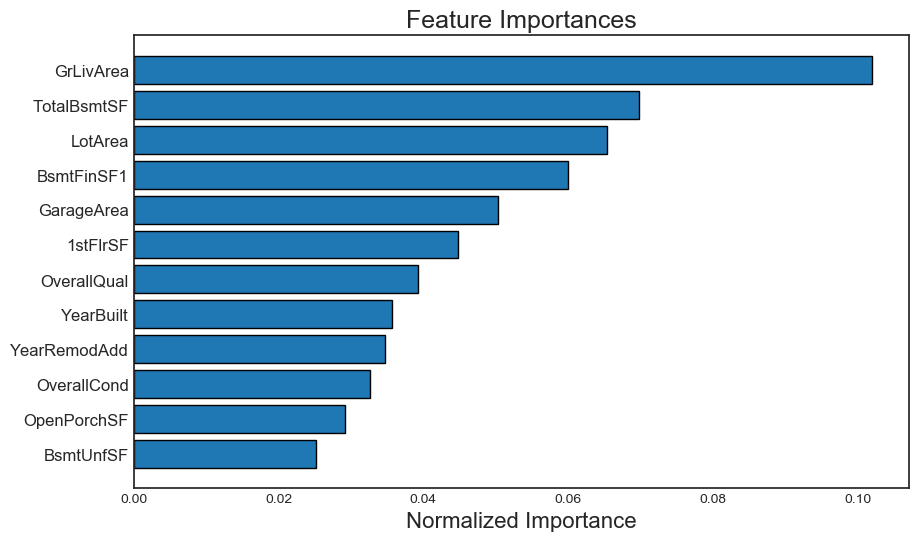

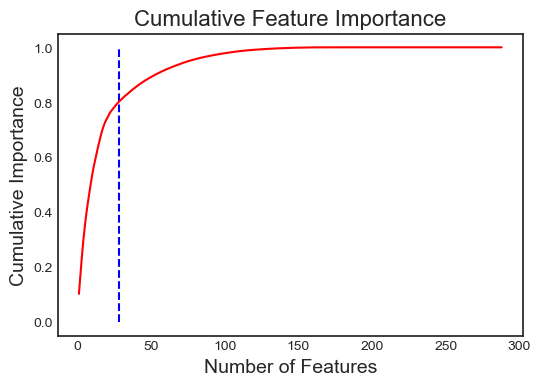

28 features required for 0.80 of cumulative importance


In [887]:
fs.plot_feature_importances(threshold = 0.80, plot_n = 12)

In [888]:
fs.feature_importances.head(15)

,feature,importance,normalized_importance,cumulative_importance
0,GrLivArea,330.1,0.101977,0.101977
1,TotalBsmtSF,225.9,0.069787,0.171764
2,LotArea,211.6,0.065369,0.237133
3,BsmtFinSF1,194.4,0.060056,0.297189
4,GarageArea,163.0,0.050355,0.347544
5,1stFlrSF,145.1,0.044825,0.392369
6,OverallQual,127.3,0.039327,0.431696
7,YearBuilt,115.5,0.035681,0.467377
8,YearRemodAdd,112.3,0.034693,0.502070
9,OverallCond,105.7,0.032654,0.534724


In [889]:
fs.identify_low_importance(cumulative_importance = 0.90)

52 features required for cumulative importance of 0.90 after one hot encoding.
236 features do not contribute to cumulative importance of 0.90.



In [890]:
low_importance_features = fs.ops['low_importance']
low_importance_features[:5]

['BsmtFinType1_ALQ',
 'Neighborhood_BrkSide',
 'GarageFinish_Fin',
 'Neighborhood_Somerst',
 'Condition1_Artery']

In [891]:
train_no_missing = fs.remove(methods = ['missing'])

Removed 5 features.


In [892]:
train_no_missing_zero = fs.remove(methods = ['missing', 'zero_importance'])

Removed 124 features.


In [893]:
train_removed_all = fs.remove(methods = 'all', keep_one_hot=False)

['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 267 features including one-hot features.


In [894]:
print('Original Number of Features', train.shape[1])
print('Final Number of Features: ', train_removed_all.shape[1])

Original Number of Features 79
Final Number of Features:  64


In [895]:
fs = FeatureSelector(data = train, labels = train_labels)

fs.identify_all(selection_params = {'missing_threshold': 0.2, 'correlation_threshold': 0.80, 
                                    'task': 'regression', 'eval_metric': 'l2', 
                                     'cumulative_importance': 0.90})

5 features with greater than 0.20 missing values.

0 features with a single unique value.

3 features with a correlation magnitude greater than 0.80.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[109]	valid_0's l2: 7.02589e+08	valid_0's l2: 7.02589e+08
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[80]	valid_0's l2: 5.35361e+08	valid_0's l2: 5.35361e+08
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[152]	valid_0's l2: 5.54922e+08	valid_0's l2: 5.54922e+08
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[114]	valid_0's l2: 8.44586e+08	valid_0's l2: 8.44586e+08
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[127]	valid_0's l2: 4.78811e+08	valid_0's l2: 4.78811e+08
Training until validation scores don

In [766]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [896]:
test.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [897]:
col_names = train_removed_all.columns
for cols in test.columns:
    if cols not in col_names:
        print(cols)
        test = test.drop(cols,axis=1)
        
    

Alley
BsmtFinSF2
1stFlrSF
LowQualFinSF
BsmtHalfBath
KitchenAbvGr
TotRmsAbvGrd
FireplaceQu
GarageArea
3SsnPorch
PoolArea
PoolQC
Fence
MiscFeature
MiscVal


In [898]:
train = train_removed_all
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'Functional', 'Fireplaces',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object'

In [899]:
test.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'Functional', 'Fireplaces',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object'

In [900]:

print(train.shape, test.shape)

(1460, 64) (1459, 64)


In [901]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 64 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null category
LotFrontage      1460 non-null int64
LotArea          1460 non-null int64
Street           1460 non-null category
LotShape         1460 non-null category
LandContour      1460 non-null category
Utilities        1460 non-null category
LotConfig        1460 non-null category
LandSlope        1460 non-null category
Neighborhood     1460 non-null category
Condition1       1460 non-null category
Condition2       1460 non-null category
BldgType         1460 non-null category
HouseStyle       1460 non-null category
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null category
RoofMatl         1460 non-null category
Exterior1st      1460 non-null category
Exterior2nd      1460 non-null cat

In [902]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 64 columns):
MSSubClass       1459 non-null int64
MSZoning         1455 non-null category
LotFrontage      1459 non-null int64
LotArea          1459 non-null int64
Street           1459 non-null category
LotShape         1459 non-null category
LandContour      1459 non-null category
Utilities        1457 non-null category
LotConfig        1459 non-null category
LandSlope        1459 non-null category
Neighborhood     1459 non-null category
Condition1       1459 non-null category
Condition2       1459 non-null category
BldgType         1459 non-null category
HouseStyle       1459 non-null category
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null category
RoofMatl         1459 non-null category
Exterior1st      1458 non-null category
Exterior2nd      1458 non-null cat

In [903]:
categorical_Attributes_train = train.select_dtypes(include=['category']).columns

In [904]:
categorical_Attributes_test = test.select_dtypes(include=['category']).columns

In [905]:
numerical_Attributes_train = train.select_dtypes(exclude=['category']).columns

In [906]:
numerical_Attributes_test = test.select_dtypes(exclude=['category']).columns

In [907]:
numerical_Attributes

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold',
       'YrSold'],
      dtype='object')

In [908]:
# Data Imputation
# Impute missing values with mean Imputation in Train
from sklearn.preprocessing import Imputer
num_mean_imputer = Imputer(strategy="mean")
for cols in numerical_Attributes_train :
    train[cols] = num_mean_imputer.fit_transform(train[[cols]])
 

In [909]:
# Data Imputation
# Impute missing values with mean Imputation in Test

from sklearn.preprocessing import Imputer
num_mean_imputer = Imputer(strategy="mean")
for cols in numerical_Attributes_test :
    test[cols] = num_mean_imputer.fit_transform(test[[cols]])
 

In [910]:
print(train.shape, test.shape)

(1460, 64) (1459, 64)


In [911]:
train = pd.get_dummies(columns=categorical_Attributes_train,data=train,prefix=categorical_Attributes_train,prefix_sep="_",drop_first=True)

In [912]:
test = pd.get_dummies(columns=categorical_Attributes_test,data=test,prefix=categorical_Attributes_test,prefix_sep="_",drop_first=True)

In [913]:
print(train.shape, test.shape)

(1460, 222) (1459, 206)


In [914]:
train.head(6)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,150.0,...,0,0,0,0,1,0,0,0,1,0
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,284.0,...,0,0,0,0,1,0,0,0,1,0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,434.0,...,0,0,0,0,1,0,0,0,1,0
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,540.0,...,0,0,0,0,1,0,0,0,0,0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,490.0,...,0,0,0,0,1,0,0,0,1,0
5,50.0,85.0,14115.0,5.0,5.0,1993.0,1995.0,0.0,732.0,64.0,...,0,0,0,0,1,0,0,0,1,0


In [915]:
test.head(6)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,270.0,...,0,0,0,0,1,0,0,0,1,0
1,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,406.0,...,0,0,0,0,1,0,0,0,1,0
2,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,137.0,...,0,0,0,0,1,0,0,0,1,0
3,60.0,78.0,9978.0,6.0,6.0,1998.0,1998.0,20.0,602.0,324.0,...,0,0,0,0,1,0,0,0,1,0
4,120.0,43.0,5005.0,8.0,5.0,1992.0,1992.0,0.0,263.0,1017.0,...,0,0,0,0,1,0,0,0,1,0
5,60.0,75.0,10000.0,6.0,5.0,1993.0,1994.0,0.0,0.0,763.0,...,0,0,0,0,1,0,0,0,1,0


In [916]:
train.isnull().sum()

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
BsmtFinSF1               0
BsmtUnfSF                0
TotalBsmtSF              0
2ndFlrSF                 0
GrLivArea                0
BsmtFullBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
Fireplaces               0
GarageYrBlt              0
GarageCars               0
WoodDeckSF               0
OpenPorchSF              0
EnclosedPorch            0
ScreenPorch              0
MoSold                   0
YrSold                   0
MSZoning_FV              0
MSZoning_RH              0
MSZoning_RL              0
MSZoning_RM              0
                        ..
GarageType_Attchd        0
GarageType_Basment       0
GarageType_BuiltIn       0
GarageType_CarPort       0
GarageType_Detchd        0
GarageFinish_RFn         0
G

In [917]:
test.isnull().sum()

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
BsmtFinSF1               0
BsmtUnfSF                0
TotalBsmtSF              0
2ndFlrSF                 0
GrLivArea                0
BsmtFullBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
Fireplaces               0
GarageYrBlt              0
GarageCars               0
WoodDeckSF               0
OpenPorchSF              0
EnclosedPorch            0
ScreenPorch              0
MoSold                   0
YrSold                   0
MSZoning_FV              0
MSZoning_RH              0
MSZoning_RL              0
MSZoning_RM              0
                        ..
Functional_Typ           0
GarageType_Attchd        0
GarageType_Basment       0
GarageType_BuiltIn       0
GarageType_CarPort       0
GarageType_Detchd        0
G

In [918]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 206 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(26), uint8(180)
memory usage: 552.9 KB


In [919]:
# Split the Train and Test Data
from sklearn.model_selection import train_test_split
# Split the data into X and y
X = train
y = train_labels

In [920]:
## Split the data into X_train, X_test, y_train, y_test with test_size = 0.20 using sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)

In [921]:
## Print the shape of X_train, X_test, y_train, y_test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1168, 222)
(292, 222)
(1168,)
(292,)


In [922]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
921,90.0,67.0,8777.0,5.0,7.0,1900.0,2003.0,0.0,1084.0,188.0,...,0,0,0,0,1,0,0,0,1,0
520,190.0,60.0,10800.0,4.0,7.0,1900.0,2000.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
401,20.0,65.0,8767.0,7.0,5.0,2005.0,2005.0,0.0,24.0,1286.0,...,0,0,1,0,0,0,0,0,0,1
280,60.0,82.0,11287.0,7.0,6.0,1989.0,1989.0,340.0,421.0,386.0,...,0,0,0,0,1,0,0,0,1,0
1401,60.0,62.0,7415.0,6.0,5.0,2004.0,2004.0,0.0,759.0,80.0,...,0,0,0,0,1,0,0,0,1,0
131,60.0,0.0,12224.0,6.0,5.0,2000.0,2000.0,40.0,695.0,297.0,...,0,0,0,0,1,0,0,0,1,0
808,80.0,85.0,13400.0,5.0,5.0,1966.0,1966.0,1047.0,516.0,380.0,...,0,0,0,0,1,0,0,0,1,0
1249,20.0,60.0,7200.0,5.0,7.0,1950.0,1950.0,0.0,534.0,246.0,...,0,0,0,0,1,0,0,0,1,0
1083,20.0,80.0,8800.0,6.0,6.0,1964.0,1964.0,425.0,553.0,698.0,...,0,0,0,0,1,0,0,0,1,0
613,20.0,70.0,8402.0,5.0,5.0,2007.0,2007.0,0.0,206.0,914.0,...,0,0,1,0,0,0,0,0,0,1


In [923]:
## Scale the numeric attributes
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for cols in numerical_Attributes_train :
    X_train[cols] = scaler.fit_transform(X_train[[cols]])
    
for cols in numerical_Attributes_test :
    X_test[cols] = scaler.fit_transform(X_test[[cols]])



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [924]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
921,0.790872,0.266648,-0.178830,-0.828481,1.263326,-2.369862,0.855995,-0.587843,1.362412,-0.857658,...,0,0,0,0,1,0,0,0,1,0
520,3.168272,0.067077,0.026099,-1.558795,1.263326,-2.369862,0.710215,-0.587843,-0.977109,-1.276879,...,0,0,0,0,1,0,0,0,1,0
401,-0.873308,0.209628,-0.179843,0.632147,-0.537241,1.097898,0.953181,-0.587843,-0.925312,1.590772,...,0,0,1,0,0,0,0,0,0,1
280,0.077652,0.694301,0.075432,0.632147,0.363042,0.569477,0.175692,1.326545,-0.068494,-0.416138,...,0,0,0,0,1,0,0,0,1,0
1401,0.077652,0.124097,-0.316800,-0.098167,-0.537241,1.064872,0.904588,-0.587843,0.660988,-1.098487,...,0,0,0,0,1,0,0,0,1,0
131,0.077652,-1.643535,0.170349,-0.098167,-0.537241,0.932766,0.710215,-0.362621,0.522861,-0.614599,...,0,0,0,0,1,0,0,0,1,0
808,0.553132,0.779832,0.289478,-0.828481,-0.537241,-0.190127,-0.941948,5.307346,0.136538,-0.429517,...,0,0,0,0,1,0,0,0,1,0
1249,-0.873308,0.067077,-0.338579,-0.828481,1.263326,-0.718548,-1.719436,-0.587843,0.175386,-0.728324,...,0,0,0,0,1,0,0,0,1,0
1083,-0.873308,0.637281,-0.176500,-0.098167,0.363042,-0.256180,-1.039134,1.805142,0.216392,0.279591,...,0,0,0,0,1,0,0,0,1,0
613,-0.873308,0.352179,-0.216817,-0.828481,-0.537241,1.163950,1.050367,-0.587843,-0.532514,0.761249,...,0,0,1,0,0,0,0,0,0,1


In [925]:
# Training the Algorithm
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=200,random_state=0)
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [926]:
# Making predictions
y_pred = rfr.predict(X_test)

In [927]:
# Evaluating the algorithm
from sklearn import metrics
print("Mean absolute Error:", metrics.mean_absolute_error(y_pred,y_test))
print("Mean Squared Error:", metrics.mean_squared_error(y_pred,y_test))
print("Root Mean Square error:", np.sqrt(metrics.mean_squared_error(y_pred,y_test)))

Mean absolute Error: 17697.430839041095
Mean Squared Error: 789127628.9170669
Root Mean Square error: 28091.415573393002


In [928]:
from sklearn.ensemble import GradientBoostingRegressor

In [839]:
GBM_model = GradientBoostingRegressor(n_estimators=50,
                                       learning_rate=0.3,
                                       subsample=0.8)

In [840]:
%time GBM_model.fit(X=X_train, y=y_train)

Wall time: 710 ms


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.3, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50, presort='auto', random_state=None,
             subsample=0.8, verbose=0, warm_start=False)

In [841]:
y_pred = GBM_model.predict(X_test)

In [842]:
# Evaluating the algorithm
from sklearn import metrics
print("Mean absolute Error:", metrics.mean_absolute_error(y_pred,y_test))
print("Mean Squared Error:", metrics.mean_squared_error(y_pred,y_test))
print("Root Mean Square error:", np.sqrt(metrics.mean_squared_error(y_pred,y_test)))

Mean absolute Error: 16022.464408755503
Mean Squared Error: 571279170.0957406
Root Mean Square error: 23901.447029327337


In [843]:
from sklearn.model_selection import GridSearchCV

# Model in use
GBM = GradientBoostingRegressor() 
 
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [100,150,200,250],
           "max_depth" : [5, 10],
           "learning_rate" : [0.1,0.5,0.9]}
 
CV_GBM = GridSearchCV(estimator=GBM, param_grid=param_grid, cv= 10)

In [844]:
%time CV_GBM.fit(X=X_train, y=y_train)

Wall time: 22min 22s


GridSearchCV(cv=10, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 150, 200, 250], 'max_depth': [5, 10], 'learning_rate': [0.1, 0.5, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [845]:
best_gbm_model = CV_GBM.best_estimator_
print (CV_GBM.best_score_, CV_GBM.best_params_)

0.8609040559790996 {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 250}


In [846]:
GBM_f = GradientBoostingRegressor(learning_rate=0.1,max_depth=5,n_estimators=250) 

In [847]:
%time GBM_model.fit(X=X_train, y=y_train)

Wall time: 784 ms


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.3, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50, presort='auto', random_state=None,
             subsample=0.8, verbose=0, warm_start=False)

In [848]:
y_pred = GBM_model.predict(X_test)

In [849]:
# Evaluating the algorithm
from sklearn import metrics
print("Mean absolute Error:", metrics.mean_absolute_error(y_pred,y_test))
print("Mean Squared Error:", metrics.mean_squared_error(y_pred,y_test))
print("Root Mean Square error:", np.sqrt(metrics.mean_squared_error(y_pred,y_test)))

Mean absolute Error: 15630.807705628524
Mean Squared Error: 518046551.292789
Root Mean Square error: 22760.636003697018
